In [104]:
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python

In [105]:
from deepface import DeepFace ### pip install deepface

In [106]:
img = cv2.imread("sad_woman.jpg")

In [107]:
import matplotlib.pyplot as plt

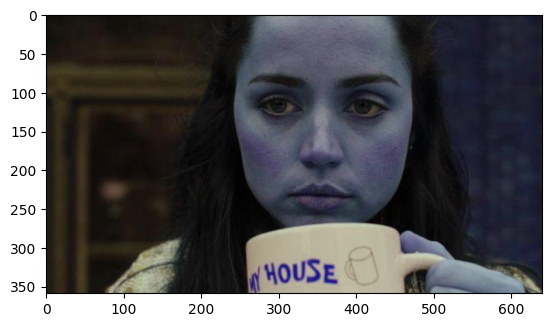

In [108]:
plt.imshow(img) # BGR

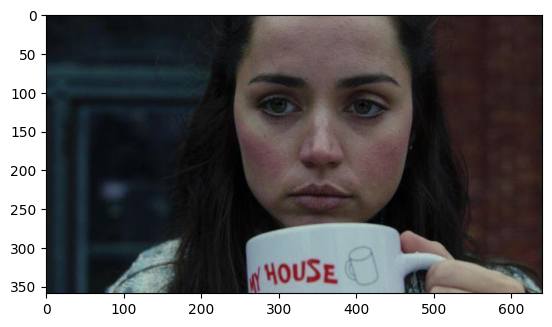

In [109]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [110]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]  


In [111]:
predictions

[{'emotion': {'angry': 10.639581718419892,
   'disgust': 9.172930482379499e-05,
   'fear': 1.2957847518196555,
   'happy': 0.0008904212867079417,
   'sad': 66.36075176958751,
   'surprise': 0.0001437211011933924,
   'neutral': 21.702757281229335},
  'dominant_emotion': 'sad',
  'region': {'x': 207,
   'y': 1,
   'w': 294,
   'h': 294,
   'left_eye': (407, 119),
   'right_eye': (301, 116)},
  'face_confidence': 0.9,
  'age': 32,
  'gender': {'Woman': 99.86346364021301, 'Man': 0.1365396659821272},
  'dominant_gender': 'Woman',
  'race': {'asian': 8.089877402179086,
   'indian': 6.32551573667024,
   'black': 1.7729760273084656,
   'white': 37.05298823434045,
   'middle eastern': 20.031366946182665,
   'latino hispanic': 26.727278633551517},
  'dominant_race': 'white'}]

In [112]:
type(predictions)

list

In [113]:
predictions[0]['dominant_emotion']

'sad'

# We are trying to draw a rectangle accross the face

In [114]:
import cv2.data


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [115]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)
# Draw anrectangle around the faces
for(x , y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

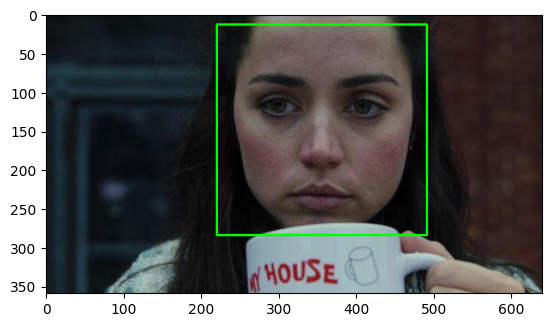

In [116]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [117]:
dominant_emotion = predictions[0].get('dominant_emotion', 'Unknown emotion')
dominant_race = predictions[0].get('dominant_race', 'Unknown race')

# Combine the values into a single string
text_to_display = f"{dominant_emotion}, {dominant_race}"

# Use putText to display the combined text
cv2.putText(img,
            text_to_display,
            (0, 50),
            font, 1,
            (0, 0, 255),
            2,
            cv2.LINE_4)


array([[[ 18,  15,  11],
        [ 18,  15,  11],
        [ 18,  15,  11],
        ...,
        [ 27,  24,  39],
        [ 28,  26,  38],
        [ 29,  27,  39]],

       [[ 18,  15,  11],
        [ 18,  15,  11],
        [ 18,  15,  11],
        ...,
        [ 27,  24,  39],
        [ 28,  26,  38],
        [ 29,  27,  39]],

       [[ 18,  15,  11],
        [ 18,  15,  11],
        [ 18,  15,  11],
        ...,
        [ 27,  24,  39],
        [ 28,  26,  38],
        [ 29,  27,  39]],

       ...,

       [[ 46,  38,  25],
        [ 42,  34,  21],
        [ 36,  30,  19],
        ...,
        [142, 136, 129],
        [106, 102,  97],
        [ 85,  80,  77]],

       [[ 46,  38,  25],
        [ 42,  34,  21],
        [ 36,  30,  19],
        ...,
        [143, 138, 129],
        [119, 113, 108],
        [100,  95,  92]],

       [[ 46,  38,  25],
        [ 42,  34,  21],
        [ 36,  30,  19],
        ...,
        [130, 125, 116],
        [121, 115, 110],
        [113, 107, 102]]

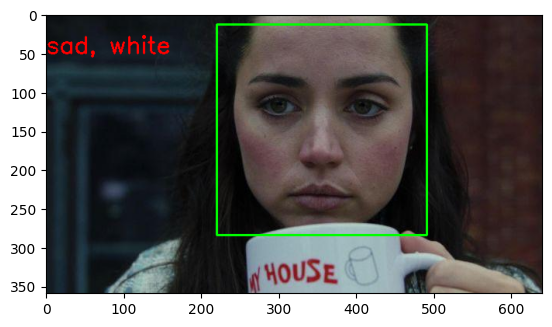

In [118]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# REAL TIME VIDEO DEMO

## Hope it works

In [2]:
import cv2 ## pip install opencv-python
## pip install opencv-contrib-python fullpackage
from deepface import DeepFace # pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
#check if webcam opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cam unable to open!")

while True:
    ret,frame = cap.read()## read 1 image from video
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw rectangle
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX  
    
    
    
    # Use putText() method to insert text into video
    cv2.putText(frame,
                result[0]['dominant_emotion'],
                (0,50),
                font, 3,
                (0, 255, 0),
                2,
                cv2.LINE_4)
    cv2.imshow('Original video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'): ## Terminate if 'q' is pressed
        break
    
cap.release()
cv2.destroyAllWindows()
    
    

2024-12-01 08:28:24.870 Python[27741:1684970] +[IMKClient subclass]: chose IMKClient_Legacy
2024-12-01 08:28:24.870 Python[27741:1684970] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


ValueError: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

: 

## IT WORKS, HUZZAH!!!